In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [4]:
#READING ACCELEROMETER DATASET

df_accel = pd.read_csv("wisdm_watch_accel.csv")

In [5]:
df_accel.head()

,Unnamed: 0,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""",...,"""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class""",location
0,10807,b'P',0.000,0.005,0.015,0.045,0.475,0.390,0.070,0.000,...,0.475261,-0.868185,0.128353,-0.192599,0.473250,0.101977,-0.268787,10.3729,b'1638',1
1,8496,b'C',0.000,0.000,0.000,0.020,0.175,0.265,0.270,0.230,...,0.454954,-0.430003,-0.683816,0.159712,0.026523,-0.324429,-0.191616,10.9713,b'1625',2
2,13875,b'R',0.845,0.120,0.015,0.005,0.000,0.000,0.000,0.000,...,0.687652,-0.650537,-0.360839,0.069997,-0.497085,0.442408,-0.522440,10.3849,b'1604',0
3,2553,b'P',0.125,0.185,0.190,0.180,0.080,0.050,0.045,0.035,...,0.708139,-0.573851,0.411031,-0.663696,-0.424415,0.219443,-0.552526,11.9201,b'1622',1
4,14263,b'M',0.000,0.035,0.010,0.065,0.150,0.540,0.180,0.020,...,0.462296,-0.729113,0.168830,-0.151120,0.468516,-0.202634,0.115061,10.4240,b'1612',2


In [8]:
df_accel = df_accel.loc[:, ~df_accel.columns.str.contains('^Unnamed')]


In [9]:
df_accel=df_accel.drop(columns=['"class"'],axis=1)


In [10]:
df_accel.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""",location
0,b'P',0.000,0.005,0.015,0.045,0.475,0.390,0.070,0.000,0.000,...,0.481447,0.475261,-0.868185,0.128353,-0.192599,0.473250,0.101977,-0.268787,10.3729,1
1,b'C',0.000,0.000,0.000,0.020,0.175,0.265,0.270,0.230,0.020,...,0.460876,0.454954,-0.430003,-0.683816,0.159712,0.026523,-0.324429,-0.191616,10.9713,2
2,b'R',0.845,0.120,0.015,0.005,0.000,0.000,0.000,0.000,0.000,...,0.696604,0.687652,-0.650537,-0.360839,0.069997,-0.497085,0.442408,-0.522440,10.3849,0
3,b'P',0.125,0.185,0.190,0.180,0.080,0.050,0.045,0.035,0.025,...,0.717357,0.708139,-0.573851,0.411031,-0.663696,-0.424415,0.219443,-0.552526,11.9201,1
4,b'M',0.000,0.035,0.010,0.065,0.150,0.540,0.180,0.020,0.000,...,0.468313,0.462296,-0.729113,0.168830,-0.151120,0.468516,-0.202634,0.115061,10.4240,2


In [11]:
x = df_accel.iloc[:, 1:].values
y = df_accel.iloc[:, 0].values
y=y.astype('str')

In [13]:
#LABEL ENCODING
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [14]:
#TRAIN TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
#RANDOM FOREST CLASSIFIER
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
#CROSSVALIDATION SCORES
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x, y, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.88 (+/- 0.01)


In [17]:
#GYROSCOPE DATA
df_gyro = pd.read_csv("watch_gyro.csv")

In [18]:
df_gyro.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'G',0.000,0.405,0.595,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.415154,-0.409820,0.437839,-0.377970,-0.379776,0.454909,-0.388720,-0.379460,0.080712,b'1637'
1,b'H',0.000,0.495,0.505,0.000,0.0,0.0,0.0,0.0,0.0,...,0.153512,0.151539,0.301326,0.194169,0.596950,0.317693,0.191077,0.642442,0.883149,b'1636'
2,b'F',0.000,0.485,0.515,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.017112,-0.016893,0.078011,-0.073113,0.279243,0.077988,-0.073347,0.279238,0.354209,b'1630'
3,b'R',0.115,0.400,0.390,0.095,0.0,0.0,0.0,0.0,0.0,...,0.467346,0.461340,0.418219,0.297418,0.245489,0.418169,0.303651,0.247868,3.880430,b'1606'
4,b'S',0.075,0.440,0.445,0.040,0.0,0.0,0.0,0.0,0.0,...,0.309764,0.305784,0.034539,-0.021879,0.162795,0.034831,-0.019876,0.162801,1.754850,b'1646'


In [19]:
df_gyro=df_gyro.drop(columns=['"class"'],axis=1)

In [20]:
x_g = df_gyro.iloc[:, 1:].values
y_g = df_gyro.iloc[:, 0].values
y_g=y_g.astype('str')

In [21]:
#LABEL ENCODING
labelencoder_y = LabelEncoder()
y_g = labelencoder_y.fit_transform(y_g)

In [22]:
#TRAIN TEST SPLIT
xg_train,xg_test,yg_train,yg_test=train_test_split(x_g,y_g,test_size=0.25,random_state=0)

In [23]:
#RANDOM FOREST CLASSIFIER
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'gini', random_state = 0)
classifier.fit(xg_train, yg_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
#CROSSVALIDATION SCORES
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_g, y_g, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.72 (+/- 0.02)


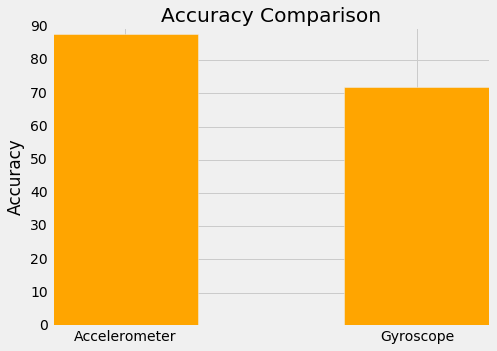

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(7,5))
x = ['Accelerometer','Gyroscope']
accuracy = [88,72]

plt.bar(x, accuracy, color = 'orange',width=0.5, align="center")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")

plt.show()